# CRISP-DM for Customer Churn Analysis

## 1. Business Understanding

**Objective**: Understand the business objectives and requirements from a business perspective.

### Steps:
- **Determine Business Objectives**: Identify the primary goals and needs of the business.
- **Assess the Situation**: Gather important information about available resources, constraints, risks, and success factors.
  - Example: Review current customer retention strategies, available data, and tools.
- **Define Data Mining Goals**: Translate business goals into specific data mining objectives.
  - Example: Identify key factors contributing to customer churn and develop a predictive model.
- **Produce Project Plan**: Outline a preliminary plan to achieve the objectives.
  - Example: Timeline, key milestones, and roles and responsibilities.

understand what leads to customer churn in the company

In [588]:
#importing

import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import numpy as np
from sklearn.utils import resample
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from pickle import dump
import os
import warnings


warnings.filterwarnings(action='ignore')

In [589]:
df = pd.read_csv('../data/telecom_churn.csv')

## 2. Data Understanding

**Objective**: Collect initial data and familiarize with the data, identifying data quality issues and gaining preliminary insights.

### Steps:
- **Collect Initial Data**: Obtain relevant data needed for the project from Kaggle.
  - **Dataset**: [Telecom Churn Dataset](https://www.kaggle.com/datasets/barun2104/telecom-churn)
- **Describe Data**: Examine data properties such as format, volume, and structure.
  - Example: Data schema, types of variables, number of records.
- **Explore Data**: Perform initial analysis to detect patterns, anomalies, and understand data distribution.
  - Example: Correlation analysis, summary statistics, visualizations.
- **Verify Data Quality**: Assess and address data quality issues like missing or inconsistent values.
  - Example: Missing value treatment, outlier detection.

In [591]:
df.shape

(3333, 11)

In [592]:

'''
churn: 0 = False, 1 = True
Data plan: 0 = False, 1 = True
Contract Renewal: 0 = False, 1 = True
'''
df.tail(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [593]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


visualize uniques values

In [596]:
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

visualize missing data

In [598]:
df.isna().sum()
# 0 missing data

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### graphs

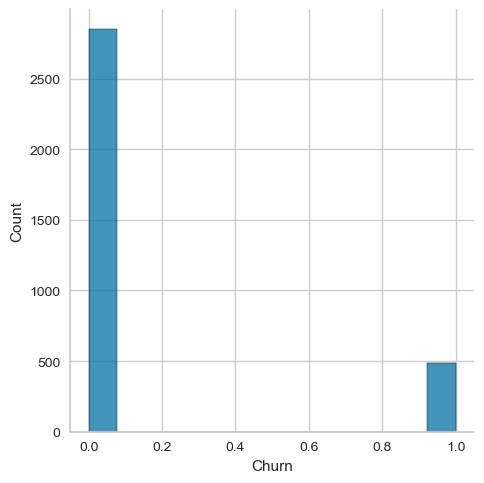

In [600]:
sns.displot(df['Churn']);

<Axes: >

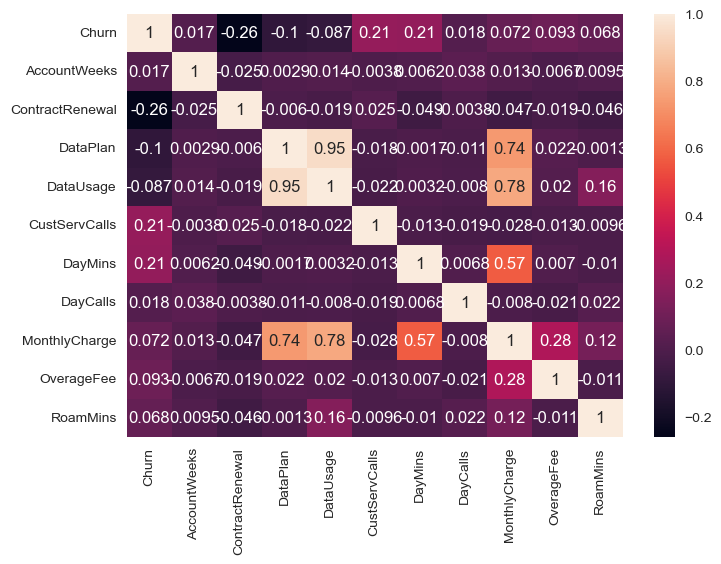

In [601]:
corr = df.corr()
sns.heatmap(corr, annot=True)

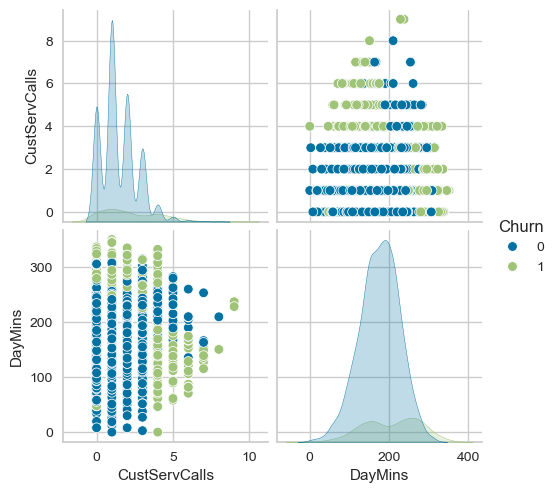

In [602]:
sns.pairplot(df[['Churn','CustServCalls','DayMins']], hue='Churn');

<Axes: xlabel='DataUsage', ylabel='Count'>

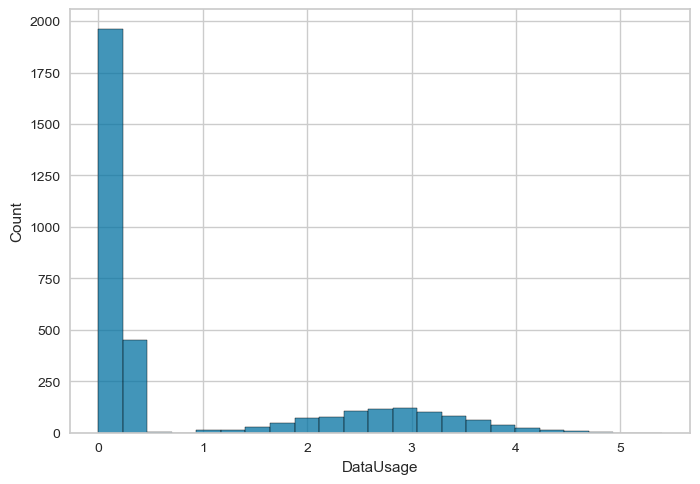

In [603]:
sns.histplot(df['DataUsage'])

<Axes: xlabel='CustServCalls', ylabel='Count'>

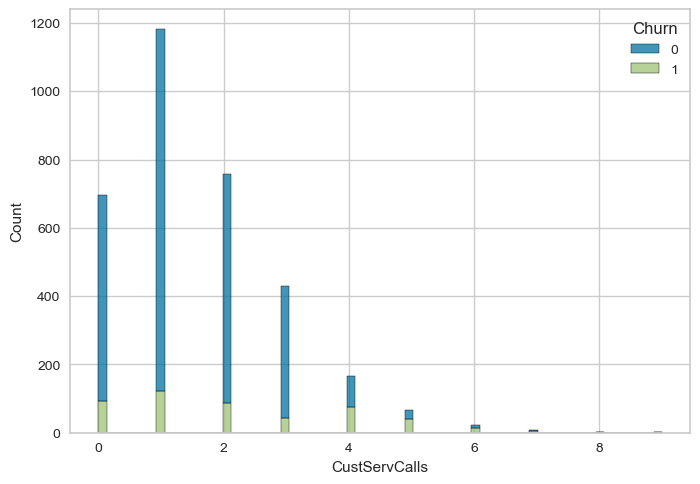

In [604]:
sns.histplot(data=df, x=df['CustServCalls'], hue='Churn',multiple='stack')

<Axes: xlabel='DayMins', ylabel='Count'>

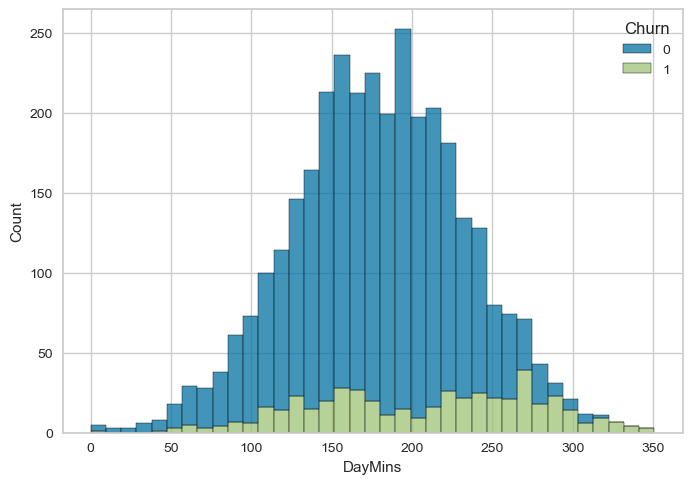

In [605]:
sns.histplot(data=df, x=df['DayMins'], hue='Churn',multiple='stack')


daymins >380~ = high porb of churn

<Axes: xlabel='AccountWeeks', ylabel='Count'>

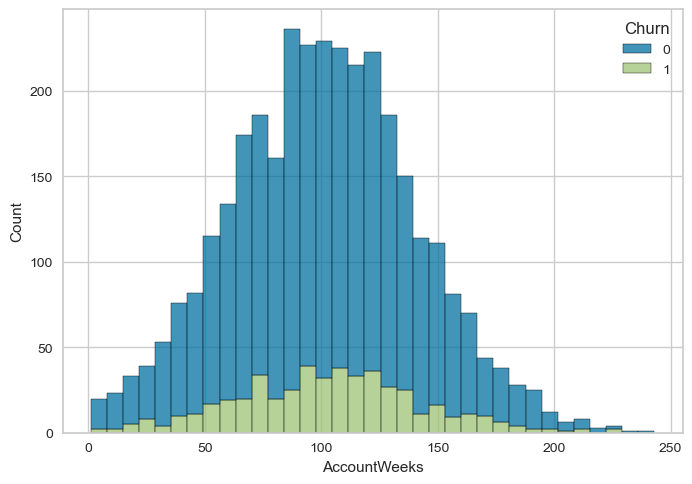

In [607]:
sns.histplot(x=df['AccountWeeks'], hue=df['Churn'], multiple='stack')

In [608]:
df['AccountWeeks']

0       128
1       107
2       137
3        84
4        75
       ... 
3328    192
3329     68
3330     28
3331    184
3332     74
Name: AccountWeeks, Length: 3333, dtype: int64

<Axes: xlabel='DataPlan', ylabel='Count'>

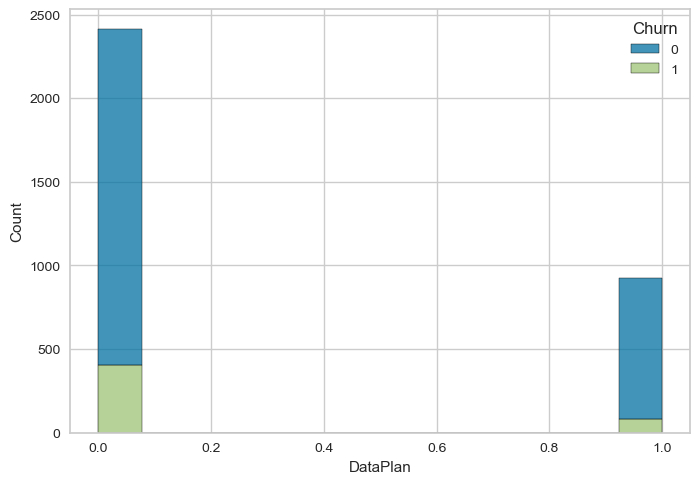

In [609]:
sns.histplot(data=df, x=df['DataPlan'], hue='Churn',multiple='stack')

<Axes: xlabel='DayMins', ylabel='DayCalls'>

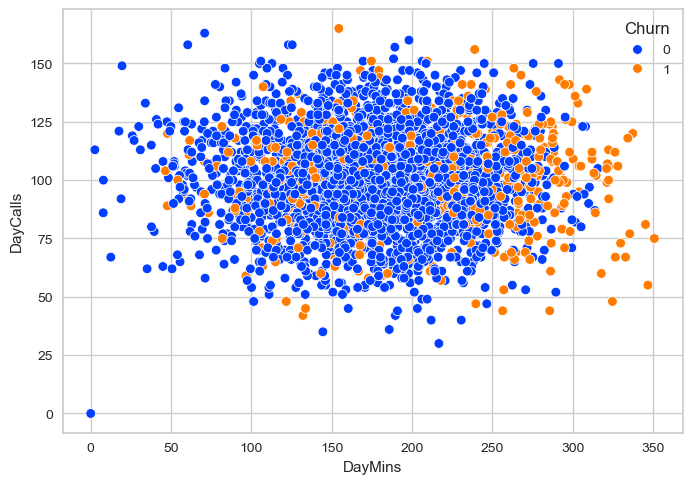

In [610]:
sns.scatterplot(data=df,x='DayMins',y='DayCalls', hue='Churn', zorder=2,palette='bright')

## 3. Data Preparation

**Objective**: Prepare the final dataset that will be used for modeling.

### Steps:
- **Select Data**: Choose relevant data for the project.
  - Example: Select data for customers active in the last two years.
- **Clean Data**: Correct or remove erroneous data and handle missing values.
  - Example: Remove duplicates, impute missing values.
- **Construct Data**: Create derived or aggregated variables that may be useful for analysis.
  - Example: Create variables such as frequency of support calls.
- **Integrate Data**: Combine data from different sources if necessary.
  - Example: Merge customer demographic data with usage data.
- **Format Data**: Structure the data in a format suitable for modeling tools.
  - Example: Normalize variables, create training and test datasets.

In [612]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [613]:
len(df.loc[df['Churn'] == 0].index)

2850

In [614]:
 df['Churn'].value_counts()[0]-df['Churn'].value_counts()[1]

2367

## feature engineering
<l> New feature: FrequentCallerToSupport, when the custservcall has bigger frequency than 3 call

In [616]:
df['FrequentCallerToSupport'] = (df['CustServCalls'] > 3).astype(int)

<Axes: xlabel='FrequentCallerToSupport', ylabel='Count'>

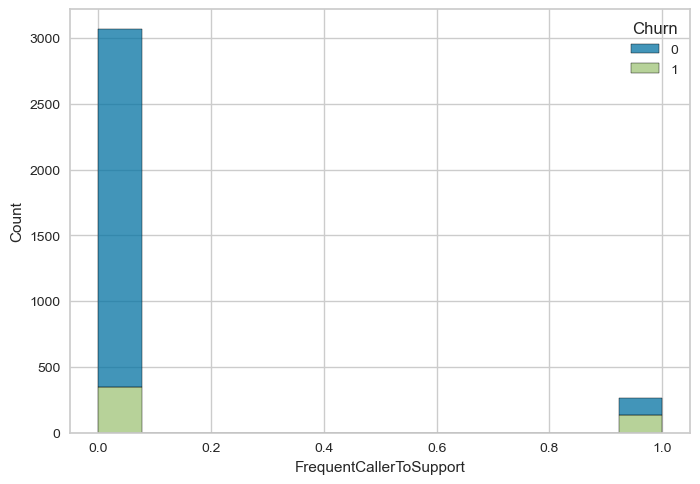

In [617]:
sns.histplot(x=df['FrequentCallerToSupport'], hue=df['Churn'], multiple='stack')

## balancing classes by removing data

In [619]:
original_df = df

In [620]:
n_rows_drop = df['Churn'].value_counts()[0]-df['Churn'].value_counts()[1]-1
print(n_rows_drop)

drop_idx = np.random.choice(df.loc[df['Churn'] == 0].index, n_rows_drop, replace=False)
df = df.drop(drop_idx)

2366


In [621]:
df['Churn'].value_counts()

Churn
0    484
1    483
Name: count, dtype: int64

In [622]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'FrequentCallerToSupport'],
      dtype='object')

In [623]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,FrequentCallerToSupport
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7,1
14,0,62,1,0,0.00,4,120.7,70,47.0,15.36,13.1,1
15,1,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4,1
21,1,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7,1
23,0,111,1,0,0.39,2,110.4,103,34.9,6.87,7.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3307,0,172,1,0,0.00,4,203.9,109,55.0,11.70,17.8,1
3320,1,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7,1
3322,1,62,1,0,0.00,4,321.1,105,78.0,13.28,11.5,1
3323,1,117,1,0,0.39,5,118.4,126,45.9,12.47,13.6,1


In [624]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [625]:
y.head()

10    1
14    0
15    1
21    1
23    0
Name: Churn, dtype: int64

In [626]:
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,FrequentCallerToSupport
10,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7,1
14,62,1,0,0.00,4,120.7,70,47.0,15.36,13.1,1
15,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4,1
21,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7,1
23,111,1,0,0.39,2,110.4,103,34.9,6.87,7.7,0


In [627]:
# X = SelectKBest(f_classif, k=1).fit_transform(X, y)
# selectin best feature with Kbest get worst results

#### 4. Modeling
- **Techniques**: Random Forest, Logistic Regression etc.
- **Testing**: Train-test split, cross-validation.
- **Model Building**: Train models, optimize parameters.
- **Model Evaluation**: Assess performance with accuracy, precision, recall, F1-score.


In [629]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [630]:
X_train.shape,X_test.shape

((773, 11), (194, 11))

# Testing multiples models  with sklearn

In [632]:
if True:
    models = []
    
    models.append(("LogisticRegression",LogisticRegression()))
    models.append(("SVC",SVC()))
    models.append(("LinearSVC",LinearSVC()))
    models.append(("KNeighbors",KNeighborsClassifier()))
    models.append(("DecisionTree",DecisionTreeClassifier()))
    models.append(("RandomForest",RandomForestClassifier()))
    rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                    max_depth=10, random_state=0, max_features=None)
    models.append(("RandomForest2",rf2))
    models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))
    models.append(('XGboost', XGBClassifier()))
    
    
    results = []
    names = []
    for name,model in models:
        result = cross_val_score(model, X_train, y_train,  cv=3, scoring='f1_macro')
        names.append(name)
        results.append(result)
    
    for i in range(len(names)):
        print(names[i],results[i].mean())

LogisticRegression 0.8341469326760608
SVC 0.6141578920354779
LinearSVC 0.43422050434982035
KNeighbors 0.5981920701006179
DecisionTree 0.770645866440209
RandomForest 0.8535759427816557
RandomForest2 0.8469897408451456
MLPClassifier 0.7255197596291194
XGboost 0.8405300965114981


* best model = random forest

In [634]:
#Training
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [635]:
pred = rf.predict(X_test)

In [636]:
y_test

911     1
1682    0
2896    0
1974    1
251     0
       ..
3305    0
2049    0
2666    1
105     0
99      1
Name: Churn, Length: 194, dtype: int64

In [637]:
pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [638]:
if True:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    
    # Config GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
    
    # fit model
    grid_search.fit(X_train, y_train)
    
    # pick up the best param
    best_params = grid_search.best_params_
    print(f'Best params: {best_params}')
    
    # score
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'F1 Score: {f1}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
F1 Score: 0.9071276595744682


Training with best params

In [640]:
model = RandomForestClassifier(**best_params,random_state=42)
model.fit(X_train,y_train)
pred = model.predict(X_test)


## 5. Evaluation

**Objective**: Thoroughly evaluate the models to ensure they meet business objectives.

### Steps:
- **Evaluate Results**: Check if models achieve the data mining and business goals.
  - Example: Random Forest model achieves an F1-score of 0.85.
- **Review Process**: Review all steps in the CRISP-DM process to identify improvements or corrections needed.
  - Example: Check data preprocessing steps, model selection.
- **Determine Next Steps**: Decide whether to implement the project or if further iterations are needed.
  - Example: Plan for model deployment or additional tuning.


* checking data dispersion

In [643]:
df['Churn'].value_counts()

Churn
0    484
1    483
Name: count, dtype: int64

In [644]:
f1_score(y_test, pred)
print(f'F1 Score: {f1}')

F1 Score: 0.9071276595744682


In [645]:
precision = precision_score(y_test, pred)
print("Precision:", precision)

Precision: 0.9130434782608695


In [646]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.8917525773195877


In [647]:
recall = recall_score(y_test, pred)
print("Recall:", recall)

Recall: 0.865979381443299


In [648]:
class_report = classification_report(y_test, pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        97
           1       0.91      0.87      0.89        97

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194



In [649]:
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[89  8]
 [13 84]]


0.8865979381443299

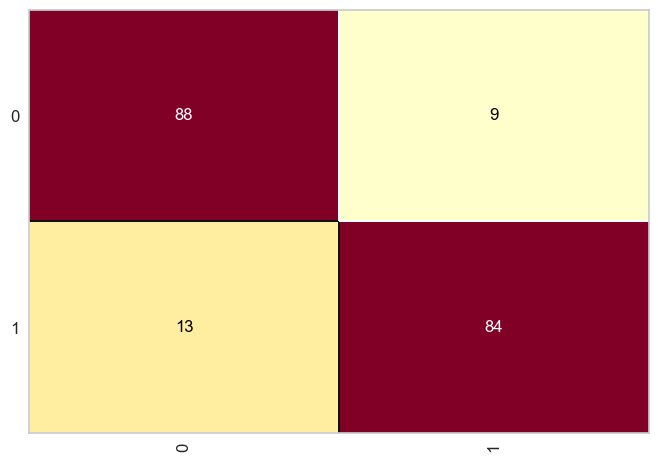

In [650]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# Boostraping

In [652]:
def boostraping_recall(x_train, y_train, R, model):
    vector = []
    n_iter = R
    for i in range(n_iter):
        x_bs, y_bs = resample(x_train, y_train)
        model.fit(x_bs, y_bs)
        y_pred_train = model.predict(x_train)
        recall_iter  = recall_score(y_train,y_pred_train)
        vector.append(recall_iter)
    return np.array(vector)



In [653]:
x_all = original_df.drop(['Churn'], axis=1)
y_all = original_df['Churn']

In [730]:
recall = boostraping_recall(x_all, y_all, R = 50, model = model)

In [731]:
print('Recall mean', np.mean(recall))
print('Recall Std', recall.std())
print('Ratio:', (recall.std() / recall.mean()) * 100)

Recall mean 0.9335751295336786
Recall Std 0.011686895757378172
Ratio: 1.251843090894654


#### 6. Deployment
- **Deployment Plan**: Implement model in CRM system, schedule tasks.
- **Monitoring**: Set up regular performance tracking and model updates.
- **Final Report**: Document entire process and results.
- **Project Review**: Conduct a post-implementation review to gather feedback and lessons learned.


In [657]:
#saved the model to disk
from pickle import dump

os.makedirs("pickle", exist_ok=True)

with open("pickle/model.pkl", "wb") as f:
    dump(rf, f, protocol=5)
    

In [658]:
from pickle import load
with open("pickle/model.pkl", "rb") as f:
    model = load(f)

In [659]:
print(f'Model atributtes:\n\nClass:{model.classes_}\nEstimators:{model.n_estimators}\nParams:{model.get_params}\n')

Model atributtes:

Class:[0 1]
Estimators:100
Params:<bound method BaseEstimator.get_params of RandomForestClassifier()>



In [660]:
X_train.head(1)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,FrequentCallerToSupport
2518,53,1,0,0.0,2,145.1,116,45.0,11.69,7.9,0


In [661]:
model.feature_importances_

array([0.06444213, 0.10665896, 0.03040841, 0.07340949, 0.08803848,
       0.16213983, 0.06443299, 0.16604406, 0.09188919, 0.07863276,
       0.0739037 ])

In [662]:
feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Peso':model.feature_importances_})

In [663]:
feature_importance

,Feature,Peso
0,AccountWeeks,0.064442
1,ContractRenewal,0.106659
2,DataPlan,0.030408
3,DataUsage,0.073409
4,CustServCalls,0.088038
5,DayMins,0.162140
6,DayCalls,0.064433
7,MonthlyCharge,0.166044
8,OverageFee,0.091889
9,RoamMins,0.078633


<Axes: title={'center': 'Feature Importances'}, xlabel='Feature'>

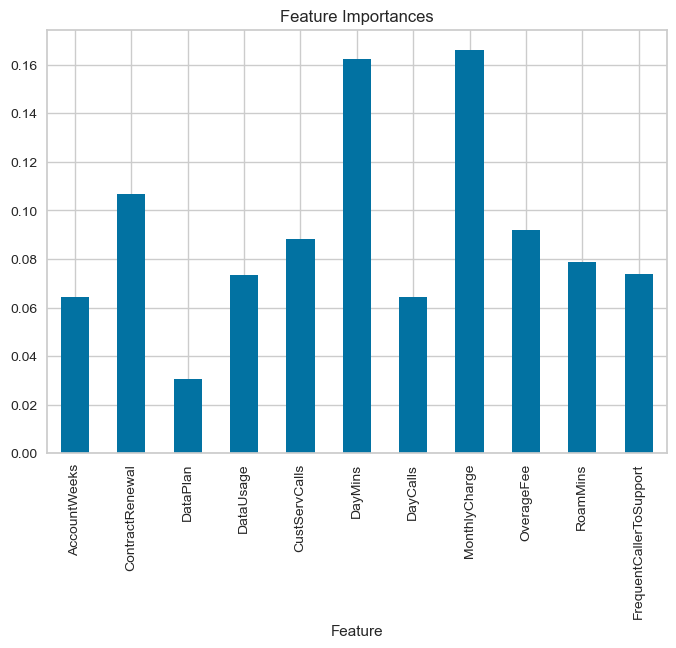

In [664]:
feature_importance.plot(kind='bar', x='Feature', y='Peso', title='Feature Importances',legend=False)

# Telecommunications Company Churn Analysis Report

## Executive Summary:
This report presents the results of a churn analysis conducted for XYZ Telecommunications Company. The aim was to understand the factors influencing customer churn and propose strategies for reducing churn rates. Data from the company’s customer database was analyzed, focusing on demographic information, usage patterns, and service subscription details.

## Key Findings:

1. **Feature Importance:**
   - Analysis revealed that average daytime minutes per month (**DayMins**) had a strong positive correlation with churn probability. Customers with higher **DayMins** are more likely to churn.
   - The number of **CustServCalls** (customer service calls) also showed a significant relationship with churn. Customers who made more calls tend to be more dissatisfied with the service, increasing their likelihood of cancellation. This suggests that customer service is a critical factor in retention.
   - **MonthlyCharge**, or the monthly fee for the plan, was another important factor. Customers with higher monthly charges had a greater tendency to churn, possibly due to the perceived cost of the service compared to its value or satisfaction level.

2. **Segmentation Analysis:**
   - Customer segmentation based on **DayMins**, **CustServCalls**, and **MonthlyCharge** revealed distinct groups with varying churn rates. Customers with high **DayMins** and frequent **CustServCalls** exhibited the highest churn rates, indicating that these customers might be frustrated with the service but still utilize it extensively.
   - Customers with higher **MonthlyCharge** but few **CustServCalls** also showed a considerable churn probability, suggesting that these customers may not find enough value in the service to justify the cost.

3. **Retention Strategies:**
   - A promising approach to improving retention is the use of **personalized and segmented offers**. By analyzing customer behavior and identifying the primary reasons for cancellation, the company can apply automatic offers tailored to individual needs. 
   - For instance, customers with high **DayMins** and frequent **CustServCalls** could receive personalized support or discounts on service plans to address potential frustration. Similarly, customers with higher **MonthlyCharge** could be offered lower-cost plans or value-added services to reduce perceived costs and improve satisfaction.
   - Automating this process using predictive models can ensure that the right offers are delivered at the right time, based on customer profiles and churn predictions.

4. **Future Recommendations:**
   - Further analysis of customer satisfaction levels and engagement metrics is recommended to gain deeper insights into the underlying reasons for churn. Continuous monitoring of **CustServCalls** and **MonthlyCharge** is crucial for adjusting retention strategies.
   - A closer look at the relationship between service usage patterns and satisfaction levels will provide valuable insights into how to improve customer loyalty.
   - Implementing an automated system for personalized offers can help the company quickly adapt to customer needs and reduce churn over time.

## Conclusion:
The analysis identified **DayMins**, **CustServCalls**, and **MonthlyCharge** as significant predictors of churn at XYZ Telecommunications. By implementing targeted retention strategies, such as offering personalized incentives and adjusting pricing structures, the company can reduce churn rates and improve overall customer satisfaction and loyalty.
atisfaction and loyalty.
